In [1]:
import sys
from pathlib import Path

# Determine the parent directory of the current notebook
notebook_path = Path().resolve()
parent_dir = notebook_path.parent

# Add the parent directory to sys.path to access utils module
sys.path.insert(0, str(parent_dir))

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from utils.misc import unify_coordinates_referential, init_logger, verify_dotenv_file
from feature_engineering import *
from matplotlib.colors import ListedColormap

In [2]:
data = NHLFeatureEngineering(
    RAW_DATA_PATH=Path(os.environ["DATA_FOLDER"], "2016_2020_raw.csv"),
    distanceToGoal=True,
    angleToGoal=True,
    isGoal=True,
    emptyNet=True,
    verbose=True,
    imputeRinkSide=True,
    periodTimeSeconds=True,
    lastEvent=True,
    lastCoordinates=True,
    timeElapsed=True,
    distanceFromLastEvent=True,
    rebound=True,
    changeAngle=True,
    speed=True,
    computePowerPlayFeatures=False,
    GOAL_POSITION=[89, 0],
    version=1,
)

all_data = data.df.query("season != 2020 & (eventType == 'SHOT' or eventType == 'GOAL')")
unify_data = data.dfUnify.query("season != 2020 & (eventType == 'SHOT' or eventType == 'GOAL')")

2023-11-13 02:38:52.374 | INFO     | feature_engineering:__init__:38 - Loading raw data from C:\Users\Utilisateur\Documents\MILA\IFT 6758\IFT6758_NHL\data\2016_2020_raw.csv
2023-11-13 02:38:56.983 | INFO     | feature_engineering:__init__:44 - Calculations of distance/angle done w.r.t GOAL_POSITION = [89, 0]
2023-11-13 02:38:58.260 | INFO     | feature_engineering:_printNaStatsBeforeUnifying:218 - Found 1611605 shots with coordinates and rinkSide specified.
2023-11-13 02:38:58.331 | INFO     | feature_engineering:_printNaStatsBeforeUnifying:223 - 
                Coordinates NA stats:
                    387056 shots without coordinates.
                    387045 shots without both X and Y coordinates.
                    9 shots without X coordinates.
                    2 shots without Y coordinates.
                
                RinkSide NA stats:
                    51815 shots without rinkSide specified. Use imputeRinkSide == True to handle missing 
                    values 

# Histogramme du nombre de tirs (buts et non-buts séparés), regroupées (binned) par distance

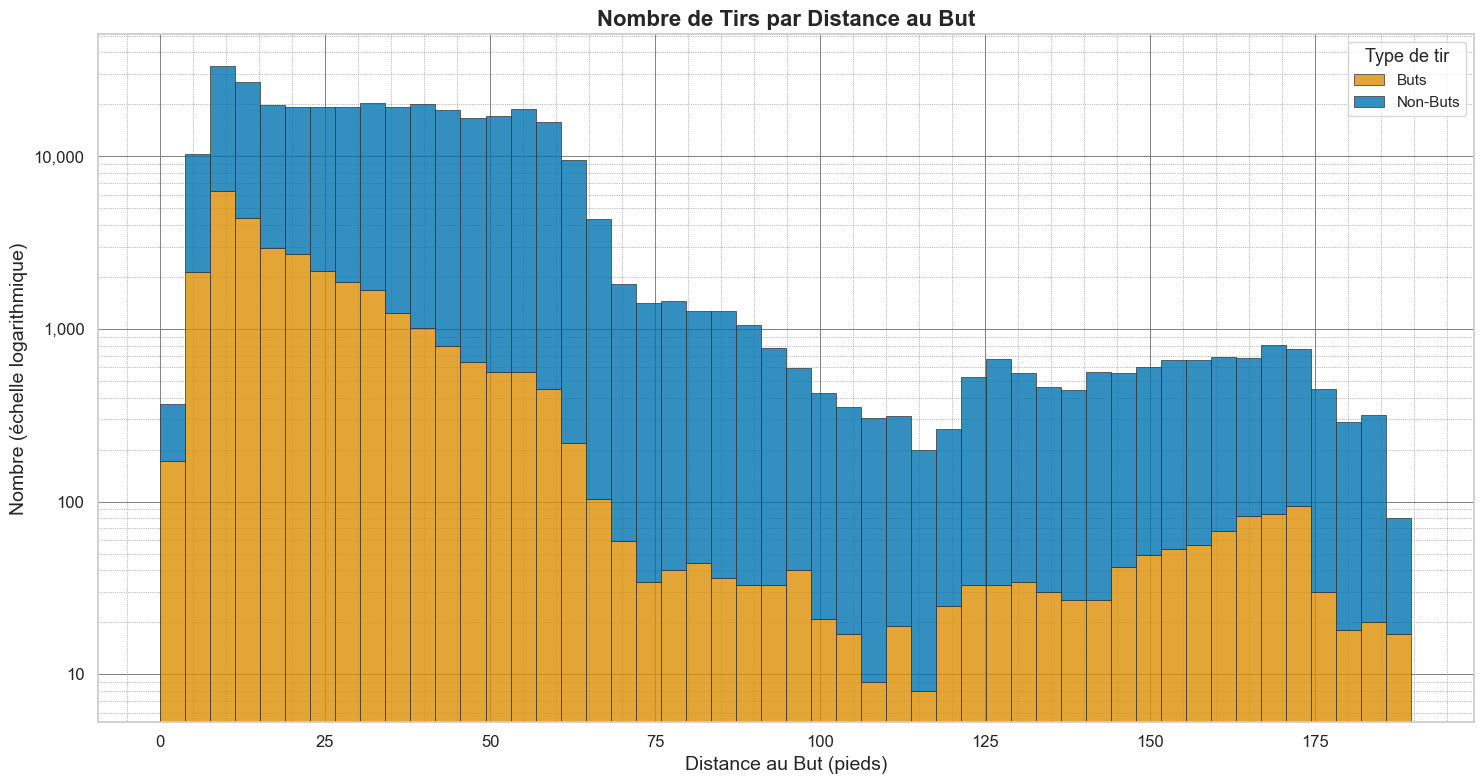

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings

warnings.filterwarnings("ignore")

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a color palette that is colorblind friendly
palette = sns.color_palette("colorblind")

# Create a figure and an axis
plt.figure(figsize=(15, 8))

# Create a histogram with a hue and colorblind-friendly palette
ax = sns.histplot(
    data=unify_data, 
    x='distanceToGoal', 
    hue='isGoal', 
    bins=50, 
    multiple='stack', 
    palette=palette,  # Apply the colorblind-friendly palette here
    edgecolor='0.2',
    linewidth=0.5,
    alpha=0.8
)

ax.legend(labels=["Buts", "Non-Buts"], title='Type de tir', title_fontsize='13', fontsize='11')

# Add major and minor grid lines
ax.grid(which='major', color='grey', linewidth=0.7)
ax.grid(which='minor', color='grey', linestyle=':', linewidth=0.5)
ax.minorticks_on()

# Adjust y-axis scale to symlog due to large range of y-values
ax.set_yscale('log')

# Adding some labels and title with French translations
ax.set_title('Nombre de Tirs par Distance au But', fontsize=16, fontweight='bold')
ax.set_xlabel('Distance au But (pieds)', fontsize=14)
ax.set_ylabel('Nombre (échelle logarithmique)', fontsize=14)

# Setting the x and y axis labels formats using French locale style if necessary
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Set the tick parameters for axes
ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.savefig("2023-10-08-Shot_vs_Distance.png", dpi=300)

# Un histogramme de nombre de tirs (buts et non-buts séparés), binned par angle

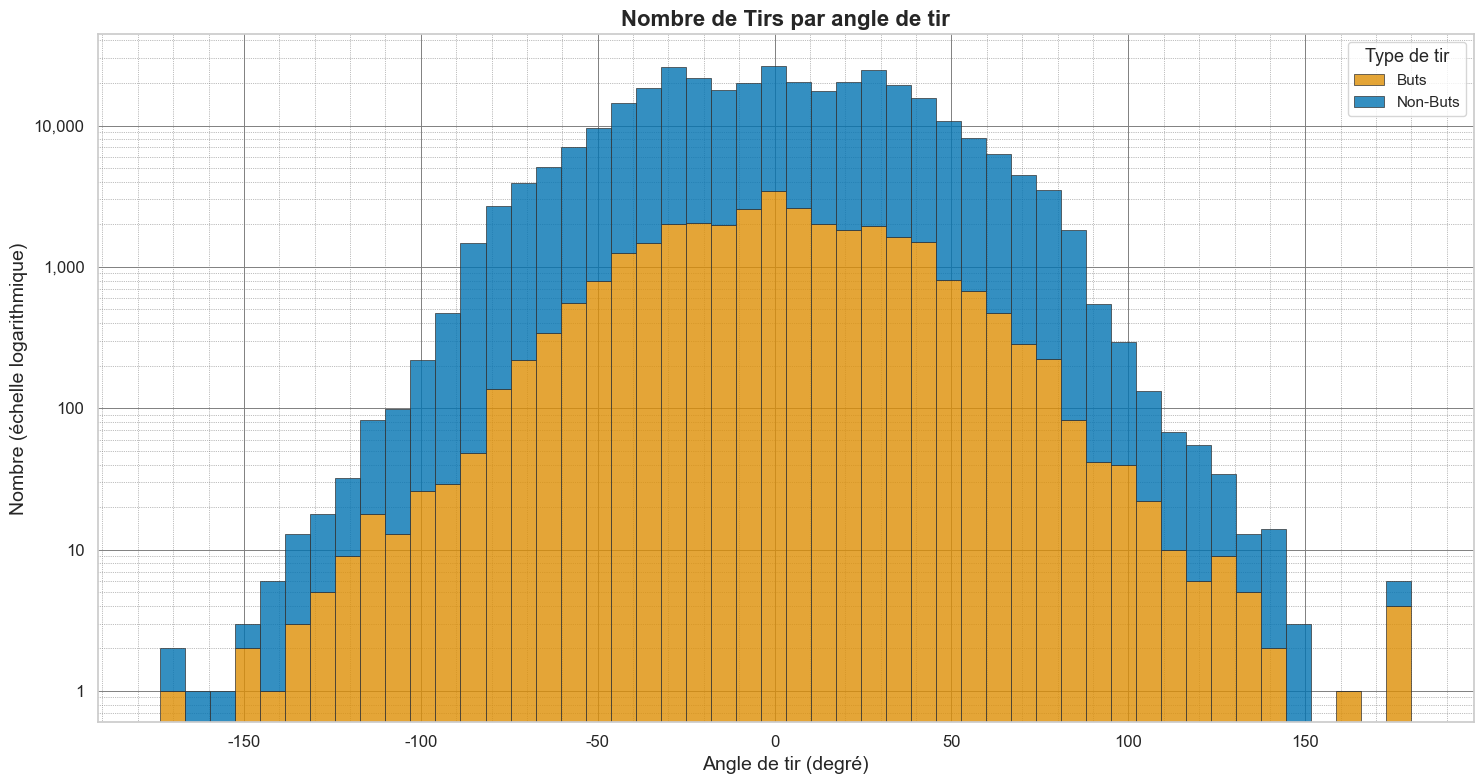

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings

warnings.filterwarnings("ignore")

# Assuming your dataframe is named data

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a color palette that is colorblind friendly
palette = sns.color_palette("colorblind")

# Create a figure and an axis
plt.figure(figsize=(15, 8))

# Create a histogram with a hue and colorblind-friendly palette
ax = sns.histplot(
    data=unify_data, 
    x='angleToGoal', 
    hue='isGoal', 
    bins=50, 
    multiple='stack', 
    palette=palette,  # Apply the colorblind-friendly palette here
    edgecolor='0.2',
    linewidth=0.5,
    alpha=0.8
)

ax.legend(labels=["Buts", "Non-Buts"], title='Type de tir', title_fontsize='13', fontsize='11')

# Add major and minor grid lines
ax.grid(which='major', color='grey', linewidth=0.7)
ax.grid(which='minor', color='grey', linestyle=':', linewidth=0.5)
ax.minorticks_on()

# Adjust y-axis scale to symlog due to large range of y-values
ax.set_yscale('log')

# Adding some labels and title with French translations
ax.set_title('Nombre de Tirs par angle de tir', fontsize=16, fontweight='bold')
ax.set_xlabel('Angle de tir (degré)', fontsize=14)
ax.set_ylabel('Nombre (échelle logarithmique)', fontsize=14)

# Setting the x and y axis labels formats using French locale style if necessary
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Set the tick parameters for axes
ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.savefig("2023-10-08-Shot_vs_Angle.png", dpi=300)

# Histogramme 2D où un axe est la distance et l'autre est l'angle. Vous n'avez pas besoin de séparer les buts et les non-buts.

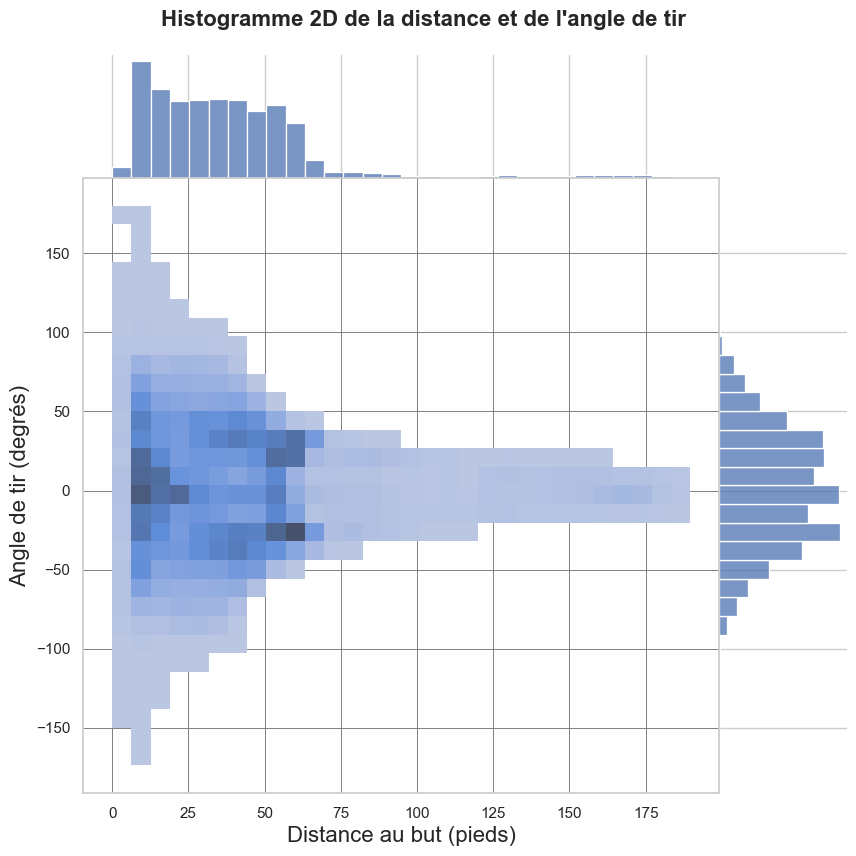

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Assuming your dataframe is named 'data'
# And the 'angle_to_goal' and 'distance_to_goal' columns contain the relevant information

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

palette = sns.color_palette("colorblind")

# Create a jointplot with 'distance_to_goal' on x-axis and 'angle_to_goal' on y-axis
joint_plot = sns.jointplot(
    data=unify_data,
    x='distanceToGoal',
    y='angleToGoal',
    kind="hist",  # Specifies a 2D histogram
    bins=30,  # Number of bins can be adjusted
    palette=palette,  # Use the pastel colormap
    space=0,  # Space between the joint and marginal plots
    marginal_kws=dict(bins=30, fill=True),
)

# Enhance the main title and axis labels
joint_plot.set_axis_labels('Distance au but (pieds)', 'Angle de tir (degrés)', fontsize=16)
joint_plot.fig.suptitle('Histogramme 2D de la distance et de l\'angle de tir', fontsize=16, fontweight='bold')

# Set grid style
joint_plot.ax_joint.grid(which='major', color='grey', linewidth=0.7)
joint_plot.ax_joint.grid(which='minor', color='grey', linestyle=':', linewidth=0.5)

# Set figure size
joint_plot.fig.set_size_inches(9, 9)

# Adjust the figure height and the space at the top to accommodate the suptitle
joint_plot.fig.subplots_adjust(top=0.93)  # Reduce plot to make room

# Display the plot
plt.savefig("2023-10-08-2D_Histogram_Distance_Angle.png", dpi=300)

# Taux de but par rapport à la distance et à l'angle du tir

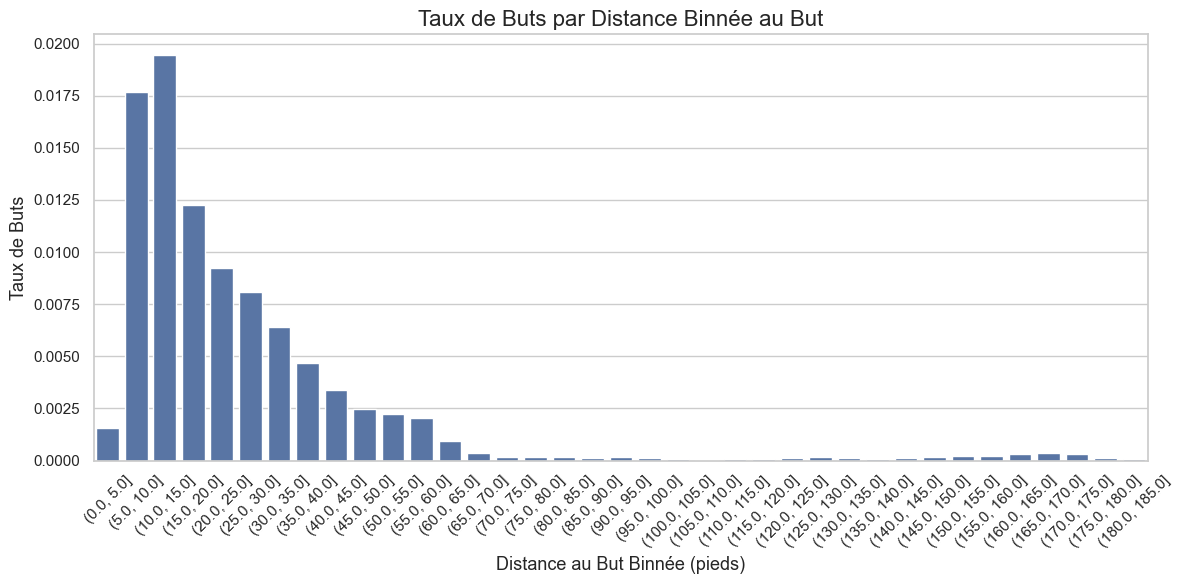

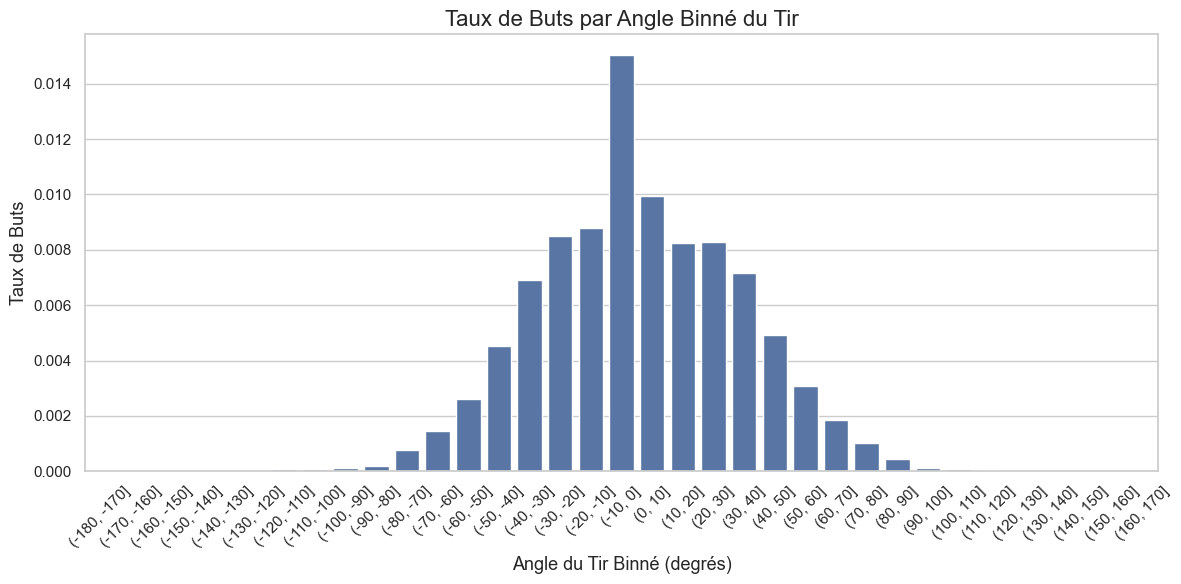

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Binning the distance and angle into discrete intervals
# Choisissez le nombre de bacs en fonction de la distribution et de la granularité des données
distance_bins = pd.cut(unify_data['distanceToGoal'], bins=np.arange(0, unify_data['distanceToGoal'].max(), 5))
angle_bins = pd.cut(unify_data['angleToGoal'], bins=np.arange(-180, 180, 10))

# Calculate the goal rate for each binned group
unify_data['distanceBin'] = distance_bins
unify_data['angleBin'] = angle_bins
distance_goal_rate = (unify_data.groupby('distanceBin')['isGoal'].sum()/unify_data.shape[0]).reset_index()
angle_goal_rate = (unify_data.groupby('angleBin')['isGoal'].sum()/unify_data.shape[0]).reset_index()

# Plot for Goal Rate vs. Binned Distance
plt.figure(figsize=(12, 6))
sns.barplot(x='distanceBin', y='isGoal', data=distance_goal_rate)
plt.xticks(rotation=45)
plt.title('Taux de Buts par Distance Binnée au But', fontsize=16)
plt.xlabel('Distance au But Binnée (pieds)', fontsize=13)
plt.ylabel('Taux de Buts', fontsize=13)
plt.tight_layout()
plt.savefig("2023-10-08-Goal_Distance_Binned.png", dpi=300)

# Plot for Goal Rate vs. Binned Angle
plt.figure(figsize=(12, 6))
sns.barplot(x='angleBin', y='isGoal', data=angle_goal_rate)
plt.xticks(rotation=45)
plt.title('Taux de Buts par Angle Binné du Tir', fontsize=16)
plt.xlabel('Angle du Tir Binné (degrés)', fontsize=13)
plt.ylabel('Taux de Buts', fontsize=13)
plt.tight_layout()
plt.savefig("2023-10-08-Goal_Angle_Binned.png", dpi=300)

unify_data.drop(columns=['distanceBin', 'angleBin'], inplace=True)

# Vérification données ont du sens

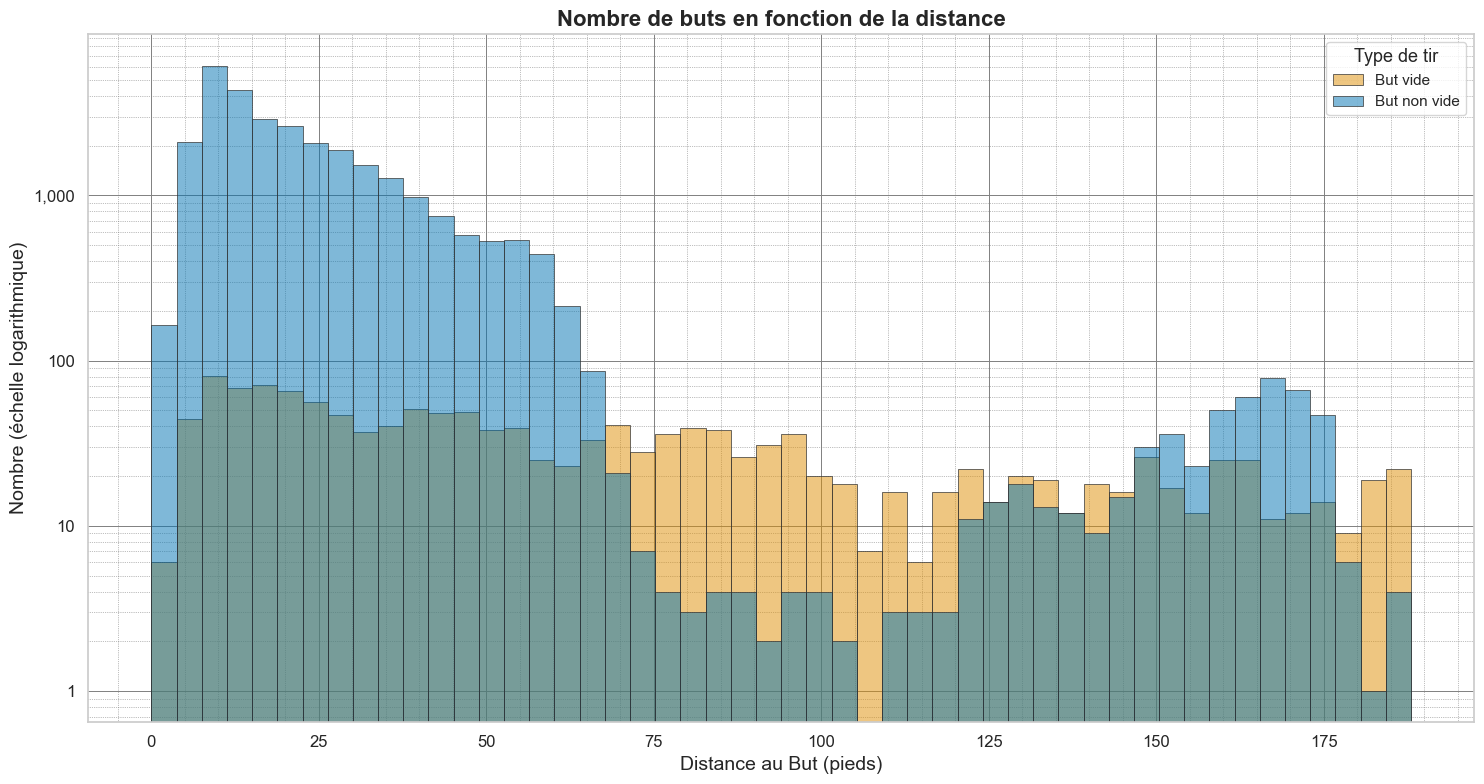

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings

warnings.filterwarnings("ignore")

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a color palette that is colorblind friendly
palette = sns.color_palette("colorblind")

# Create a figure and an axis
plt.figure(figsize=(15, 8))

# Create a histogram with a hue and colorblind-friendly palette
ax = sns.histplot(
    data=unify_data[unify_data["eventType"] == "GOAL"], 
    x='distanceToGoal', 
    hue='emptyNet', 
    bins=50, 
    multiple='layer', 
    palette=palette,  # Apply the colorblind-friendly palette here
    edgecolor='0.2',
    linewidth=0.5,
    alpha=0.5
)

ax.legend(labels=["But vide", "But non vide"], title='Type de tir', title_fontsize='13', fontsize='11')

# Add major and minor grid lines
ax.grid(which='major', color='grey', linewidth=0.7)
ax.grid(which='minor', color='grey', linestyle=':', linewidth=0.5)
ax.minorticks_on()

# Adjust y-axis scale to symlog due to large range of y-values
ax.set_yscale('log')

# Adding some labels and title with French translations
ax.set_title('Nombre de buts en fonction de la distance', fontsize=16, fontweight='bold')
ax.set_xlabel('Distance au But (pieds)', fontsize=14)
ax.set_ylabel('Nombre (échelle logarithmique)', fontsize=14)

# Setting the x and y axis labels formats using French locale style if necessary
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Set the tick parameters for axes
ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.savefig("2023-10-08-Goal_Distance.png", dpi=300)

# Analyse des buts net non vides

### Quelques exemples d'anomalies

In [53]:
# La zone défensive est la 
outliers = unify_data.query("eventType == 'GOAL' & emptyNet == 0 & coordinateX < -50 & season == 2019")[["gameId", "season", "gameDate", "gameType", "homeTeam", "awayTeam", "byTeam", "period", "periodTime", "rinkSide", "eventType", "shooter", "coordinateX", "coordinateY", "emptyNet"]]
print("Proportion de buts net non vide par rapport à l'ensemble des évènements SHOT/GOAL :", (len(outliers)/len(unify_data)) * 100, "%")
print("En nombre absolu :", (len(outliers)), "cas")
print("En voici quelques exemples :")
outliers.tail(29)

Proportion de buts net non vide par rapport à l'ensemble des évènements SHOT/GOAL : 0.09966827731410655 %
En nombre absolu : 329 cas
En voici quelques exemples :


,gameId,season,gameDate,gameType,homeTeam,awayTeam,byTeam,period,periodTime,rinkSide,eventType,shooter,coordinateX,coordinateY,emptyNet
1701312,2019030411,2019,2020-09-19,P,TBL,DAL,DAL,1,05:40,left,GOAL,Joel Hanley,-68.0,1.0,0
1701341,2019030411,2019,2020-09-19,P,TBL,DAL,TBL,1,12:32,left,GOAL,Yanni Gourde,-86.0,-2.0,0
1701460,2019030411,2019,2020-09-19,P,TBL,DAL,DAL,2,12:30,left,GOAL,Jamie Oleksiak,-83.0,-7.0,0
1701509,2019030411,2019,2020-09-19,P,TBL,DAL,DAL,2,19:32,left,GOAL,Joel Kiviranta,-64.0,-2.0,0
1701718,2019030412,2019,2020-09-22,P,TBL,DAL,TBL,1,11:23,left,GOAL,Brayden Point,-69.0,1.0,0
1701732,2019030412,2019,2020-09-22,P,TBL,DAL,TBL,1,14:22,left,GOAL,Ondrej Palat,-76.0,-16.0,0
1701868,2019030412,2019,2020-09-22,P,TBL,DAL,DAL,2,14:43,left,GOAL,Joe Pavelski,-74.0,0.0,0
1701949,2019030412,2019,2020-09-22,P,TBL,DAL,DAL,3,05:27,left,GOAL,Mattias Janmark,-86.0,-4.0,0
1702074,2019030413,2019,2020-09-24,P,DAL,TBL,TBL,1,05:33,left,GOAL,Nikita Kucherov,-72.0,-1.0,0
1702082,2019030413,2019,2020-09-24,P,DAL,TBL,TBL,1,06:58,left,GOAL,Steven Stamkos,-78.0,13.0,0


La série ci-dessus est très intéressante. En effet, on remarque rapidement que l'ensemble des anomalies ci-dessus ont eu lieu entre le Lightning de Tampa Bay et les Dallas Stars, à des dates consécutives.
Après une courte recherche sur internet, nous avons réalisé que cette série de match représente la finale de la coupe Stanley pour la saison 2019! 

Si on regarde plus particulièrement la distribution des types des parties, on peut voir que la large majoritée des cas proviennent de parties en série éliminatoire, et plus intéressant encore, l'ensemble de ces anomalies proviennent de la saison 2019!

In [58]:
# Assuming 'outliers' is your DataFrame
season_gameType_count = outliers.groupby(["season", "gameType"]).size().unstack(fill_value=0)
season_gameType_count["Total"] = season_gameType_count.sum(axis=1)
season_gameType_count

gameType,P,R,Total
season,,,
2019,280,49,329


Allons maintenant analyser de plus près ces anomalies

In [59]:
pd.set_option('display.max_columns', None)
case_outlier = outliers.query("gameId == 2019030415 & shooter == 'Corey Perry'")
case_outlier

,gameId,season,gameDate,gameType,homeTeam,awayTeam,byTeam,period,periodTime,rinkSide,eventType,shooter,coordinateX,coordinateY,emptyNet
1702940,2019030415,2019,2020-09-27,P,TBL,DAL,DAL,1,17:52,left,GOAL,Corey Perry,-74.0,2.0,0


Nous allons nous référer aux données brutes afin d'éléminer notre traitement des données comme cause potentielle de l'anomalie.

In [60]:
raw_data = pd.read_csv(Path(os.environ["DATA_FOLDER"], "2016_2020_raw.csv"))
raw_data.loc[case_outlier.index][["gameId", "gameDate", "homeTeam", "awayTeam", "byTeam", "period", "periodTime", "rinkSide", "eventType", "shooter", "coordinateX", "coordinateY", "emptyNet"]]

,gameId,gameDate,homeTeam,awayTeam,byTeam,period,periodTime,rinkSide,eventType,shooter,coordinateX,coordinateY,emptyNet
1702940,2019030415,2020-09-27,TBL,DAL,DAL,1,17:52,right,GOAL,Corey Perry,74.0,-2.0,False


Ici, rinkSide est défini comme étant à droite, impliquant ainsi que le but des Dallas Stars était du côté droit de la glace, et que ces derniers attaquaient le but adverse du côté gauche de la glace. Cependant, en se fiant aux coordonées de l'évènement, cela impliquerait que Corey Perry, un joueur des Dallas Stars, ait marqué contre les Lighning de Tampa Bay en décochant un tir profondément dans sa zone défensive, soit à depuis la coordonée X de 74, et ce sur un but gardé. Cela semble très étrange ... Heureusement, grâce à NHL Game Center nous pouvons voir une reprise vidéo de l'évènement pour voir s'il y a une incohérence dans les données.

- Vous pouvez voir l'enregistrement à ce lien : [https://www.nhl.com/gamecenter/dal-vs-tbl/2020/09/26/2019030415]

On peut clairement voir que Corey Perry attaque du côté droit de la glace et non pas du côté gauche. Ainsi, la valeur de rinkSide dans les données initiale est clairement éronnée, ou du moins ne respecte pas la convention de l'ensemble des autres parties du jeu de donnée. 